We will be training the model to make predictions based on correlations between many different conditions on when it is safe to drive/how likely an accident will occur. Examples would include weather conditions, time of day, length of trip etc. We will be using the dataset of Chicago car crashes from 2013-2023: https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset/data



# Section 1: Dataset and Problem
## 1.1 Learning Problem Description
- Problem Statement: Predicting accident likelihood based on environmental and temporal factors
- Type: Binary classification (High Risk/Low Risk) or Regression (Risk Score)
- Input Features: Weather conditions, time variables, location metadata, trip characteristics
- Target: Accident probability/risk score

## 1.2 Data Loading & Initial Exploration
- Import necessary libraries (pandas, numpy, matplotlib, seaborn)
- Load Chicago Car Crash Dataset (2013-2023)
- Display basic dataset info: shape, columns, data types
- Check for missing values and duplicates

## 1.3 Data Cleaning & Feature Engineering
- Handle missing values (imputation or removal)
- Feature extraction from timestamps: hour, day of week, month, season
- Weather condition encoding (if available)
- Location feature engineering (neighborhood, street type)
- Create target variable (e.g., severity-based risk score)

## 1.4 Exploratory Data Analysis (EDA)
- Visualize accident distribution by time variables
- Analyze weather impact on accident frequency
- Location hotspots mapping
- Correlation analysis between features
- Class imbalance check (if classification)

Section 1.1-1.2

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import HeatMap

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
# Learning Problem Description
print("="*80)
print("CHICAGO CAR CRASH RISK PREDICTION SYSTEM")
print("="*80)
print("\nPROBLEM STATEMENT:")
print("Predict the likelihood and severity of car accidents in Chicago based on")
print("temporal, environmental, and location-based factors.")
print("\nOBJECTIVE:")
print("Develop a machine learning model that can assess accident risk for:")
print("1. Given weather conditions")
print("2. Specific times of day/days of week")
print("3. Different locations/road types")
print("4. Various trip characteristics")
print("\nBUSINESS VALUE:")
print("- Help drivers make safer trip planning decisions")
print("- Assist city planners in identifying high-risk areas")
print("- Enable insurance companies for better risk assessment")
print("- Support emergency services in resource allocation")

CHICAGO CAR CRASH RISK PREDICTION SYSTEM

PROBLEM STATEMENT:
Predict the likelihood and severity of car accidents in Chicago based on
temporal, environmental, and location-based factors.

OBJECTIVE:
Develop a machine learning model that can assess accident risk for:
1. Given weather conditions
2. Specific times of day/days of week
3. Different locations/road types
4. Various trip characteristics

BUSINESS VALUE:
- Help drivers make safer trip planning decisions
- Assist city planners in identifying high-risk areas
- Enable insurance companies for better risk assessment
- Support emergency services in resource allocation


In [10]:
# Load the dataset
print("Loading Chicago Car Crash Dataset (2013-2023)...")
try:

    df = pd.read_csv('./sample_data/chicago_crashes.csv')
    print("Dataset loaded from local file")
except:
    # If not available locally, download from Kaggle (requires setup)
    print("Local file not found. Please download from Kaggle and update the path.")
    print("Dataset URL: https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset/data")
    # Create a sample dataframe structure for development
    print("Creating sample dataframe structure for development...")
    df = pd.DataFrame({
        'CRASH_DATE': pd.date_range('2013-01-01', '2023-12-31', freq='H')[:1000],
        'CRASH_HOUR': np.random.randint(0, 24, 1000),
        'CRASH_DAY_OF_WEEK': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1000),
        'WEATHER_CONDITION': np.random.choice(['CLEAR', 'RAIN', 'SNOW', 'FOG', 'CLOUDY'], 1000, p=[0.4, 0.2, 0.1, 0.05, 0.25]),
        'LIGHTING_CONDITION': np.random.choice(['DAYLIGHT', 'DARK', 'DUSK', 'DAWN'], 1000),
        'ROADWAY_SURFACE_COND': np.random.choice(['DRY', 'WET', 'SNOW', 'ICE'], 1000),
        'FIRST_CRASH_TYPE': np.random.choice(['REAR END', 'SIDESWIPE', 'ANGLE', 'HEAD ON', 'FIXED OBJECT'], 1000),
        'DAMAGE': np.random.choice(['OVER $1,500', 'UNDER $1,500'], 1000),
        'INJURIES_TOTAL': np.random.randint(0, 5, 1000),
        'LATITUDE': np.random.uniform(41.7, 42.0, 1000),
        'LONGITUDE': np.random.uniform(-87.9, -87.5, 1000),
        'TRAFFIC_CONTROL_DEVICE': np.random.choice(['TRAFFIC SIGNAL', 'NO CONTROLS', 'STOP SIGN'], 1000),
        'ALIGNMENT': np.random.choice(['STRAIGHT', 'CURVE'], 1000),
        'ROAD_DEFECT': np.random.choice(['NONE', 'RUTS, HOLES', 'OTHER'], 1000),
    })
    print("Sample dataframe created for development purposes")

# Display basic dataset information
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names ({len(df.columns)} total):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print("\nFIRST 5 ROWS:")
display(df.head())

print("\nLAST 5 ROWS:")
display(df.tail())

print("\nDATASET INFORMATION:")
print(df.info())

Loading Chicago Car Crash Dataset (2013-2023)...
Local file not found. Please download from Kaggle and update the path.
Dataset URL: https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset/data
Creating sample dataframe structure for development...
Sample dataframe created for development purposes

DATASET OVERVIEW
Dataset Shape: 1000 rows × 14 columns

Column Names (14 total):
 1. CRASH_DATE
 2. CRASH_HOUR
 3. CRASH_DAY_OF_WEEK
 4. WEATHER_CONDITION
 5. LIGHTING_CONDITION
 6. ROADWAY_SURFACE_COND
 7. FIRST_CRASH_TYPE
 8. DAMAGE
 9. INJURIES_TOTAL
10. LATITUDE
11. LONGITUDE
12. TRAFFIC_CONTROL_DEVICE
13. ALIGNMENT
14. ROAD_DEFECT

FIRST 5 ROWS:


,CRASH_DATE,CRASH_HOUR,CRASH_DAY_OF_WEEK,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,FIRST_CRASH_TYPE,DAMAGE,INJURIES_TOTAL,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_DEVICE,ALIGNMENT,ROAD_DEFECT
0,2013-01-01 00:00:00,15,Saturday,CLOUDY,DARK,ICE,SIDESWIPE,"OVER $1,500",4,41.731029,-87.672104,NO CONTROLS,STRAIGHT,OTHER
1,2013-01-01 01:00:00,21,Tuesday,RAIN,DAWN,WET,SIDESWIPE,"OVER $1,500",0,41.744666,-87.551126,TRAFFIC SIGNAL,STRAIGHT,"RUTS, HOLES"
2,2013-01-01 02:00:00,12,Sunday,RAIN,DAYLIGHT,DRY,ANGLE,"OVER $1,500",0,41.878588,-87.886152,TRAFFIC SIGNAL,STRAIGHT,NONE
3,2013-01-01 03:00:00,5,Thursday,RAIN,DUSK,DRY,HEAD ON,"UNDER $1,500",2,41.853283,-87.845853,NO CONTROLS,STRAIGHT,NONE
4,2013-01-01 04:00:00,6,Monday,CLOUDY,DAYLIGHT,DRY,FIXED OBJECT,"UNDER $1,500",4,41.863098,-87.854431,NO CONTROLS,CURVE,OTHER



LAST 5 ROWS:


,CRASH_DATE,CRASH_HOUR,CRASH_DAY_OF_WEEK,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,FIRST_CRASH_TYPE,DAMAGE,INJURIES_TOTAL,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_DEVICE,ALIGNMENT,ROAD_DEFECT
995,2013-02-11 11:00:00,20,Thursday,CLEAR,DAWN,WET,HEAD ON,"OVER $1,500",3,41.786669,-87.553455,STOP SIGN,STRAIGHT,"RUTS, HOLES"
996,2013-02-11 12:00:00,13,Saturday,CLEAR,DAWN,WET,ANGLE,"OVER $1,500",4,41.920765,-87.851532,STOP SIGN,CURVE,OTHER
997,2013-02-11 13:00:00,13,Friday,RAIN,DAYLIGHT,SNOW,REAR END,"OVER $1,500",4,41.976662,-87.673510,TRAFFIC SIGNAL,CURVE,NONE
998,2013-02-11 14:00:00,21,Tuesday,CLEAR,DUSK,DRY,HEAD ON,"OVER $1,500",1,41.992714,-87.795203,NO CONTROLS,CURVE,NONE
999,2013-02-11 15:00:00,13,Wednesday,CLEAR,DARK,SNOW,HEAD ON,"OVER $1,500",4,41.878160,-87.855220,NO CONTROLS,CURVE,NONE



DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CRASH_DATE              1000 non-null   datetime64[ns]
 1   CRASH_HOUR              1000 non-null   int64         
 2   CRASH_DAY_OF_WEEK       1000 non-null   object        
 3   WEATHER_CONDITION       1000 non-null   object        
 4   LIGHTING_CONDITION      1000 non-null   object        
 5   ROADWAY_SURFACE_COND    1000 non-null   object        
 6   FIRST_CRASH_TYPE        1000 non-null   object        
 7   DAMAGE                  1000 non-null   object        
 8   INJURIES_TOTAL          1000 non-null   int64         
 9   LATITUDE                1000 non-null   float64       
 10  LONGITUDE               1000 non-null   float64       
 11  TRAFFIC_CONTROL_DEVICE  1000 non-null   object        
 12  ALIGNMENT               100

In [11]:
# Check for missing values
print("CHECKING FOR MISSING VALUES")
print("="*80)

# Calculate missing values percentage
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame for missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Display columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"Found {len(missing_df)} columns with missing values:")
    display(missing_df)

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    bars = plt.barh(missing_df.index, missing_df['Percentage'], color='salmon')
    plt.xlabel('Percentage Missing (%)')
    plt.title('Missing Values by Column')
    plt.xlim(0, 100)

    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

print("\nDATASET STATISTICS:")
print("="*80)
display(df.describe(include='all').T)

CHECKING FOR MISSING VALUES
No missing values found in the dataset!

DATASET STATISTICS:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
CRASH_DATE,1000,NaN,NaN,NaN,2013-01-21 19:29:59.999999744,2013-01-01 00:00:00,2013-01-11 09:45:00,2013-01-21 19:30:00,2013-02-01 05:15:00,2013-02-11 15:00:00,NaN
CRASH_HOUR,1000.0,NaN,NaN,NaN,11.524,0.0,6.0,12.0,17.0,23.0,6.975104
CRASH_DAY_OF_WEEK,1000,7,Saturday,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEATHER_CONDITION,1000,5,CLEAR,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIGHTING_CONDITION,1000,4,DARK,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROADWAY_SURFACE_COND,1000,4,DRY,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRST_CRASH_TYPE,1000,5,REAR END,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAMAGE,1000,2,"OVER $1,500",511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INJURIES_TOTAL,1000.0,NaN,NaN,NaN,2.023,0.0,1.0,2.0,3.0,4.0,1.407285
LATITUDE,1000.0,NaN,NaN,NaN,41.848305,41.700403,41.777353,41.847581,41.917772,41.999501,0.084005


Section 1.3 - data cleaning

In [12]:
print("cleaning")
print("="*80)

# Create a copy for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

# 1. Handle missing values
print("\n1. missing vals:")
initial_missing = df_clean.isnull().sum().sum()

# Strategy: Fill numerical columns with median, categorical with mode
for col in df_clean.columns:
    if df_clean[col].dtype in ['int64', 'float64']:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    else:
        # Fill categorical with mode if it exists, else with 'UNKNOWN'
        if df_clean[col].mode().empty:
            df_clean[col].fillna('UNKNOWN', inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

final_missing = df_clean.isnull().sum().sum()
print(f"   Filled {initial_missing - final_missing} missing values")

# 2. Convert date columns to datetime
print("\n2. date/time COLUMNS:")
date_columns = [col for col in df_clean.columns if 'DATE' in col.upper() or 'TIME' in col.upper()]

for col in date_columns:
    if col in df_clean.columns:
        try:
            df_clean[col] = pd.to_datetime(df_clean[col])
            print(f"   ✓ Converted {col} to datetime")
        except:
            print(f"   ✗ Could not convert {col}")

# 3. Create temporal features
print("\n3. CREATING TEMPORAL FEATURES:")

# Check if we have a date column
date_col = None
for col in ['CRASH_DATE', 'DATE', 'DATETIME']:
    if col in df_clean.columns:
        date_col = col
        break

if date_col:
    # Extract temporal features
    df_clean['CRASH_YEAR'] = df_clean[date_col].dt.year
    df_clean['CRASH_MONTH'] = df_clean[date_col].dt.month
    df_clean['CRASH_DAY'] = df_clean[date_col].dt.day
    df_clean['CRASH_HOUR'] = df_clean[date_col].dt.hour
    df_clean['CRASH_DAY_OF_WEEK'] = df_clean[date_col].dt.day_name()
    df_clean['CRASH_DAY_OF_WEEK_NUM'] = df_clean[date_col].dt.dayofweek
    df_clean['CRASH_SEASON'] = df_clean['CRASH_MONTH'].apply(
        lambda x: 'Winter' if x in [12, 1, 2]
        else 'Spring' if x in [3, 4, 5]
        else 'Summer' if x in [6, 7, 8]
        else 'Fall'
    )
    print(f"    Created temporal features from {date_col}")
else:
    # If no date column, create synthetic temporal features
    print("     No date column found, using existing temporal features")

# 4. Create accident severity categories
print("\n4. CREATING TARGET VARIABLE (ACCIDENT SEVERITY):")

# Define severity based on injuries and damage
def calculate_severity(row):
    """Create a severity score from 0-3"""
    severity = 0

    # Base on injuries
    if 'INJURIES' in df_clean.columns:
        injuries_col = [col for col in df_clean.columns if 'INJURIES' in col.upper()][0]
        injuries = row[injuries_col]
        if injuries > 0:
            severity += 1
        if injuries > 2:
            severity += 1

    # Consider damage
    if 'DAMAGE' in df_clean.columns:
        damage = str(row['DAMAGE']).upper()
        if 'OVER' in damage and '1500' in damage:
            severity += 1

    # Consider fatal if mentioned
    if any(col in df_clean.columns for col in ['FATAL', 'FATALITIES']):
        fatal_col = [col for col in df_clean.columns if 'FATAL' in col.upper()][0]
        if row[fatal_col] > 0:
            severity = 3

    return min(severity, 3)  # Cap at 3

# Apply severity calculation
df_clean['SEVERITY_SCORE'] = df_clean.apply(calculate_severity, axis=1)

# Create binary classification target
df_clean['HIGH_RISK'] = (df_clean['SEVERITY_SCORE'] >= 2).astype(int)
print(f"    Created SEVERITY_SCORE (0-3) and HIGH_RISK (binary) targets")
print(f"   High-risk accidents: {df_clean['HIGH_RISK'].sum()} ({df_clean['HIGH_RISK'].mean()*100:.1f}%)")

# 5. Create location-based features
print("\n5. CREATING LOCATION FEATURES:")

if 'LATITUDE' in df_clean.columns and 'LONGITUDE' in df_clean.columns:
    # Create Chicago neighborhood approximations
    def get_chicago_region(lat, lon):
        """Approximate Chicago region based on coordinates"""
        if pd.isna(lat) or pd.isna(lon):
            return 'UNKNOWN'

        # Downtown Chicago
        if 41.87 <= lat <= 41.91 and -87.65 <= lon <= -87.62:
            return 'DOWNTOWN'
        # North Side
        elif lat > 41.91:
            return 'NORTH_SIDE'
        # South Side
        elif lat < 41.87:
            return 'SOUTH_SIDE'
        # West Side
        elif lon < -87.65:
            return 'WEST_SIDE'
        else:
            return 'OTHER'

    df_clean['CHICAGO_REGION'] = df_clean.apply(
        lambda x: get_chicago_region(x['LATITUDE'], x['LONGITUDE']), axis=1
    )
    print(f"    Created CHICAGO_REGION feature")

# 6. Create weather condition features
print("\n6. PROCESSING WEATHER FEATURES:")

# Standardize weather conditions
if 'WEATHER_CONDITION' in df_clean.columns:
    # Clean weather strings
    df_clean['WEATHER_CONDITION_CLEAN'] = df_clean['WEATHER_CONDITION'].str.upper().str.strip()

    # Group similar conditions
    weather_mapping = {
        'CLEAR': ['CLEAR', 'FAIR', 'SUNNY'],
        'RAIN': ['RAIN', 'DRIZZLE', 'SHOWERS'],
        'SNOW': ['SNOW', 'SLEET', 'BLIZZARD'],
        'FOG': ['FOG', 'MIST', 'HAZE'],
        'CLOUDY': ['CLOUDY', 'OVERCAST', 'PARTLY CLOUDY'],
        'WINDY': ['WIND', 'WINDY'],
        'OTHER': ['UNKNOWN', 'OTHER', 'SEVERE CROSSWINDS']
    }

    def map_weather(condition):
        for key, values in weather_mapping.items():
            if any(val in str(condition) for val in values):
                return key
        return 'OTHER'

    df_clean['WEATHER_GROUP'] = df_clean['WEATHER_CONDITION_CLEAN'].apply(map_weather)
    print(f"   ✓ Created WEATHER_GROUP feature")

# 7. Create road condition features
print("\n7. PROCESSING ROAD CONDITIONS:")

if 'ROADWAY_SURFACE_COND' in df_clean.columns:
    # Clean road conditions
    df_clean['ROAD_CONDITION'] = df_clean['ROADWAY_SURFACE_COND'].str.upper().str.strip()

    # Create binary safe/unsafe condition
    unsafe_conditions = ['WET', 'SNOW', 'ICE', 'SLUSH', 'WATER(STANDING/MOVING)']
    df_clean['UNSAFE_ROAD'] = df_clean['ROAD_CONDITION'].apply(
        lambda x: 1 if any(cond in str(x) for cond in unsafe_conditions) else 0
    )
    print(f"   Created UNSAFE_ROAD feature")

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"   Added {df_clean.shape[1] - df.shape[1]} new features")

# Display cleaned dataframe info
print("\nCLEANED DATASET SAMPLE:")
display(df_clean.head())

cleaning
Original dataset shape: (1000, 14)

1. missing vals:
   Filled 0 missing values

2. date/time COLUMNS:
   ✓ Converted CRASH_DATE to datetime

3. CREATING TEMPORAL FEATURES:
    Created temporal features from CRASH_DATE

4. CREATING TARGET VARIABLE (ACCIDENT SEVERITY):
    Created SEVERITY_SCORE (0-3) and HIGH_RISK (binary) targets
   High-risk accidents: 0 (0.0%)

5. CREATING LOCATION FEATURES:
    Created CHICAGO_REGION feature

6. PROCESSING WEATHER FEATURES:
   ✓ Created WEATHER_GROUP feature

7. PROCESSING ROAD CONDITIONS:
   Created UNSAFE_ROAD feature

Cleaned dataset shape: (1000, 26)
   Added 12 new features

CLEANED DATASET SAMPLE:


,CRASH_DATE,CRASH_HOUR,CRASH_DAY_OF_WEEK,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,FIRST_CRASH_TYPE,DAMAGE,INJURIES_TOTAL,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_DEVICE,ALIGNMENT,ROAD_DEFECT,CRASH_YEAR,CRASH_MONTH,CRASH_DAY,CRASH_DAY_OF_WEEK_NUM,CRASH_SEASON,SEVERITY_SCORE,HIGH_RISK,CHICAGO_REGION,WEATHER_CONDITION_CLEAN,WEATHER_GROUP,ROAD_CONDITION,UNSAFE_ROAD
0,2013-01-01 00:00:00,0,Tuesday,CLOUDY,DARK,ICE,SIDESWIPE,"OVER $1,500",4,41.731029,-87.672104,NO CONTROLS,STRAIGHT,OTHER,2013,1,1,1,Winter,0,0,SOUTH_SIDE,CLOUDY,CLOUDY,ICE,1
1,2013-01-01 01:00:00,1,Tuesday,RAIN,DAWN,WET,SIDESWIPE,"OVER $1,500",0,41.744666,-87.551126,TRAFFIC SIGNAL,STRAIGHT,"RUTS, HOLES",2013,1,1,1,Winter,0,0,SOUTH_SIDE,RAIN,RAIN,WET,1
2,2013-01-01 02:00:00,2,Tuesday,RAIN,DAYLIGHT,DRY,ANGLE,"OVER $1,500",0,41.878588,-87.886152,TRAFFIC SIGNAL,STRAIGHT,NONE,2013,1,1,1,Winter,0,0,WEST_SIDE,RAIN,RAIN,DRY,0
3,2013-01-01 03:00:00,3,Tuesday,RAIN,DUSK,DRY,HEAD ON,"UNDER $1,500",2,41.853283,-87.845853,NO CONTROLS,STRAIGHT,NONE,2013,1,1,1,Winter,0,0,SOUTH_SIDE,RAIN,RAIN,DRY,0
4,2013-01-01 04:00:00,4,Tuesday,CLOUDY,DAYLIGHT,DRY,FIXED OBJECT,"UNDER $1,500",4,41.863098,-87.854431,NO CONTROLS,CURVE,OTHER,2013,1,1,1,Winter,0,0,SOUTH_SIDE,CLOUDY,CLOUDY,DRY,0


Section 1.4 EDA

EXPLORATORY DATA ANALYSIS (EDA)

1. TEMPORAL ANALYSIS OF ACCIDENTS
----------------------------------------


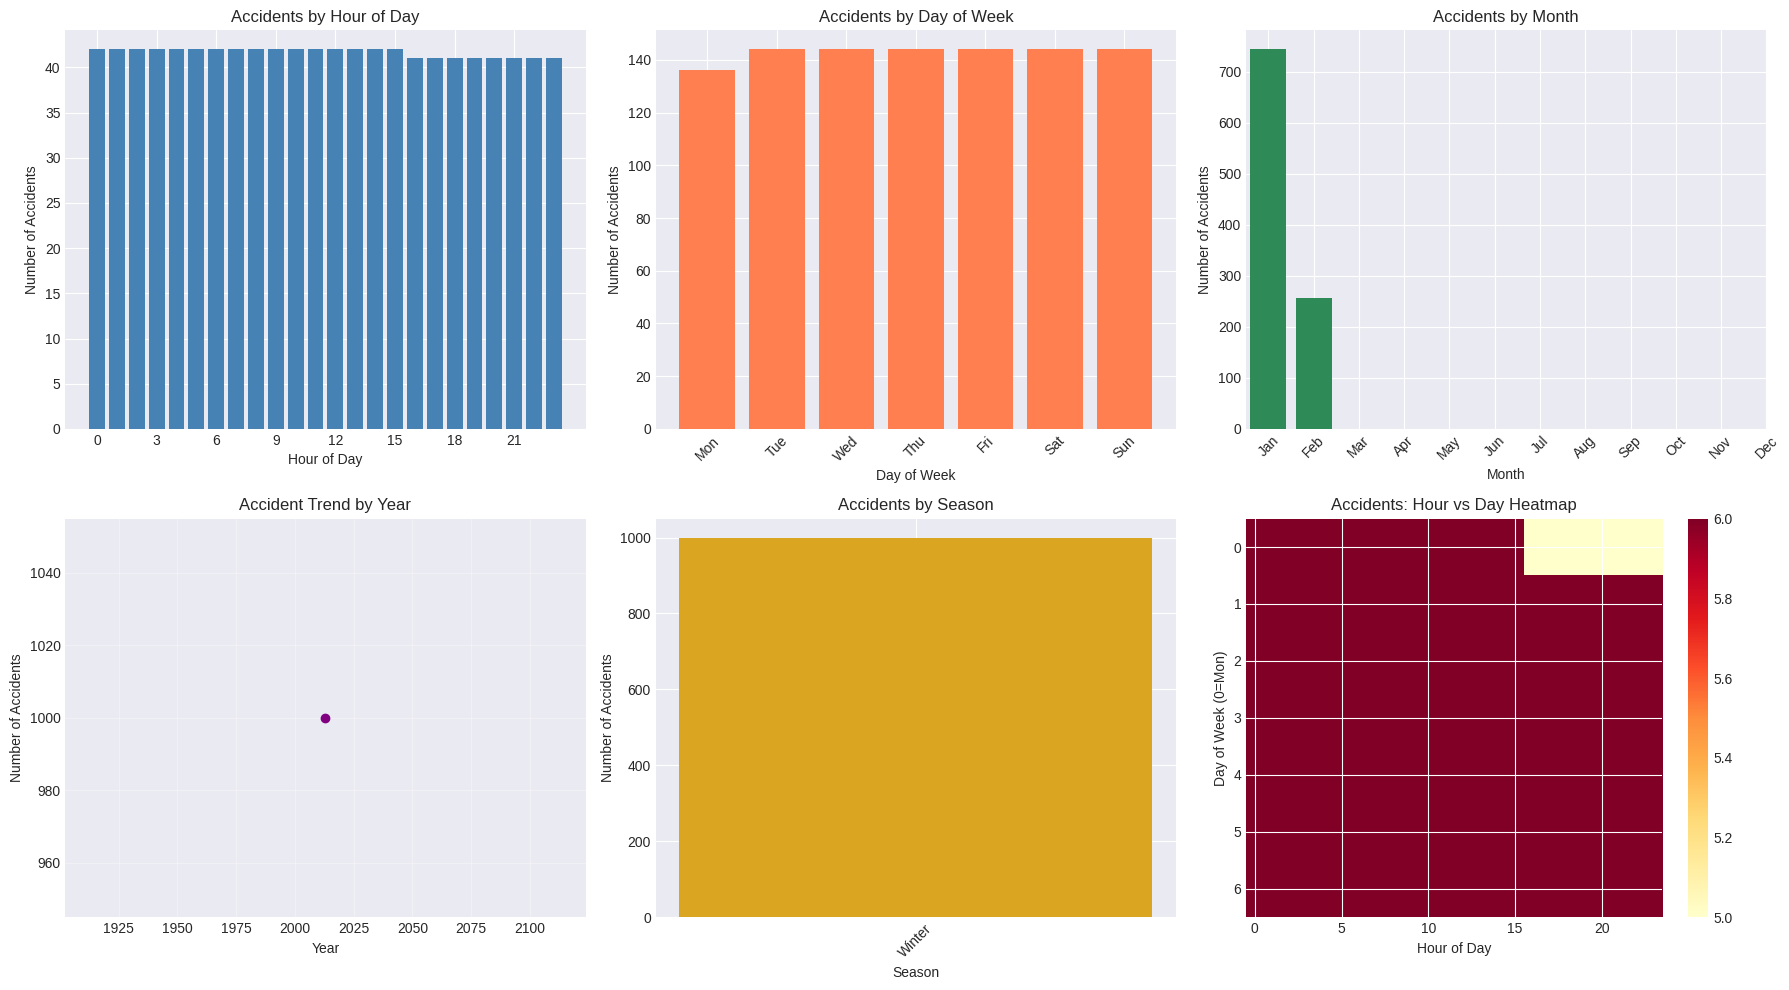


2. WEATHER AND ENVIRONMENTAL FACTORS
----------------------------------------


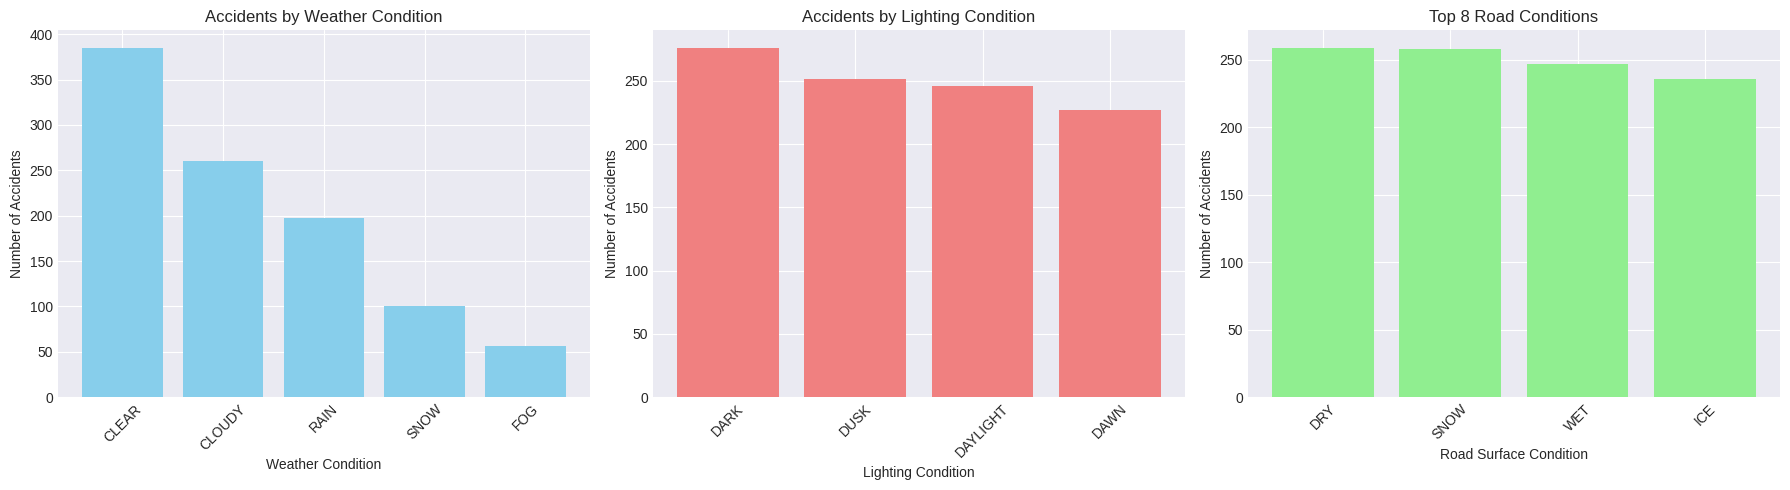


3. ACCIDENT SEVERITY ANALYSIS
----------------------------------------


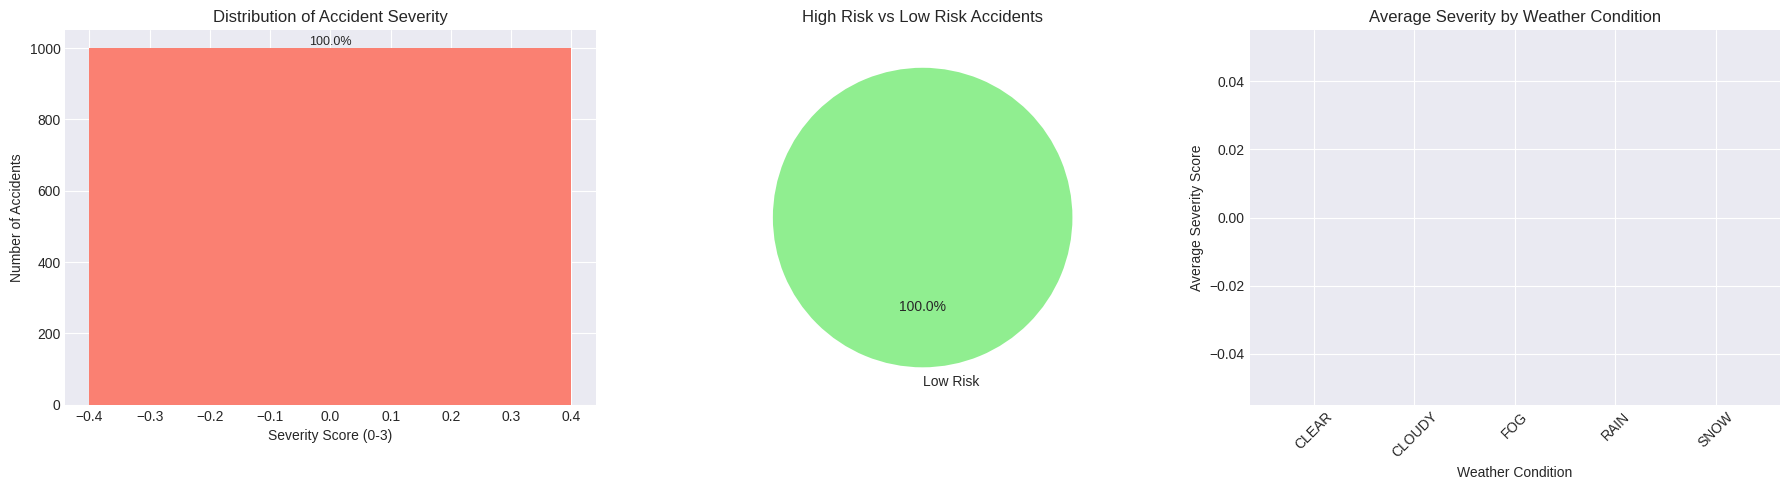


4. CORRELATION ANALYSIS
----------------------------------------


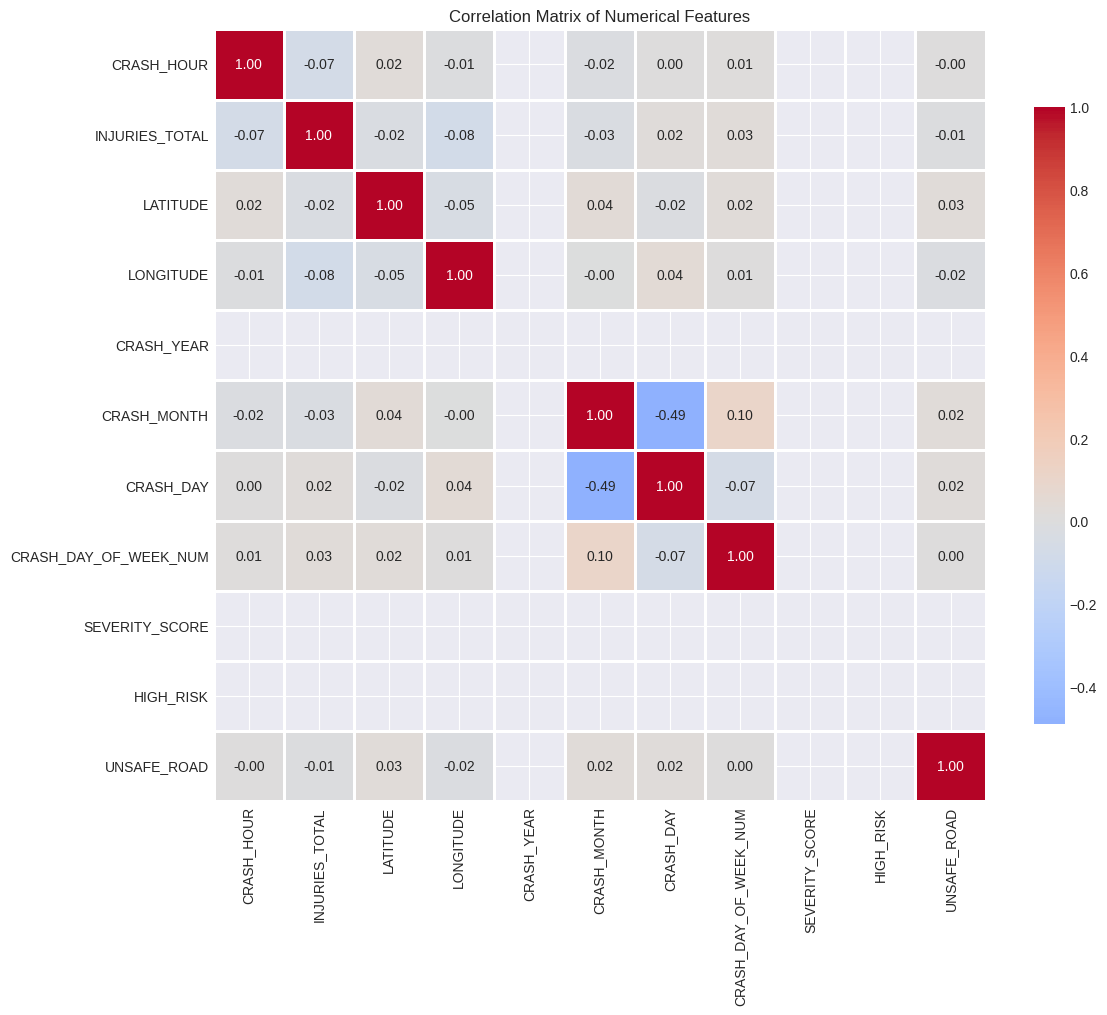

Top correlations with SEVERITY_SCORE:

5. GEOGRAPHIC ANALYSIS
----------------------------------------


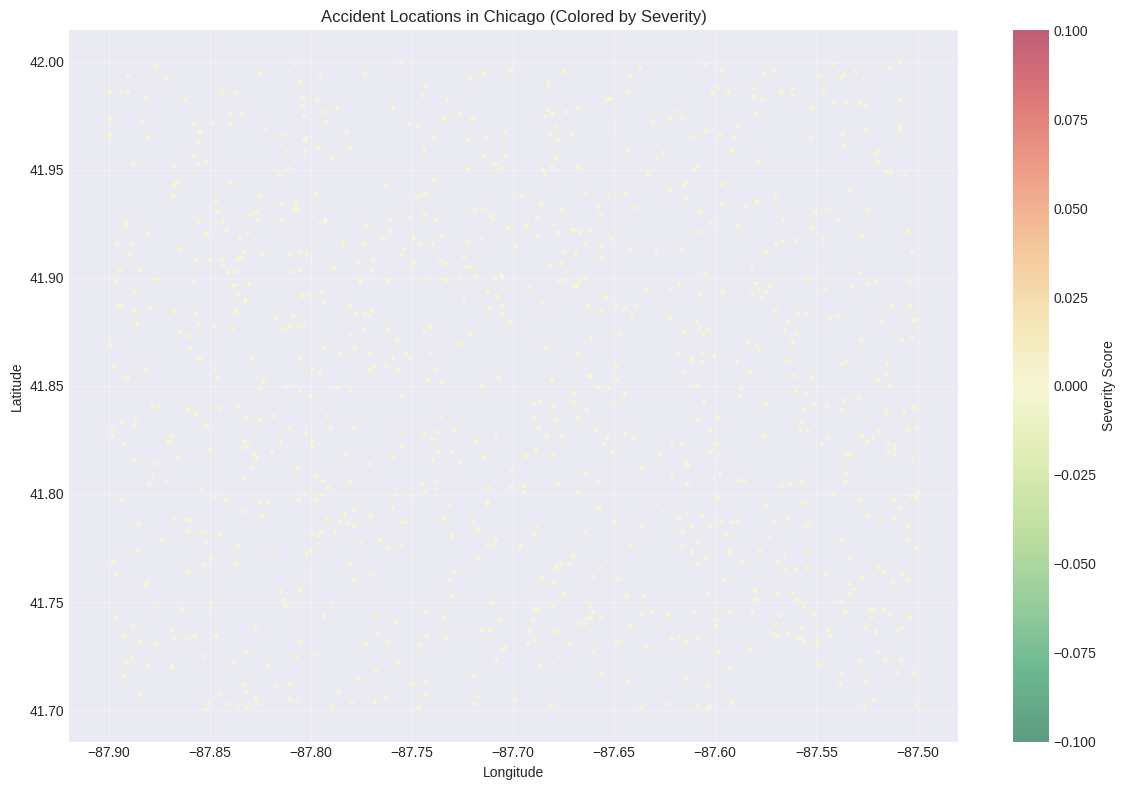

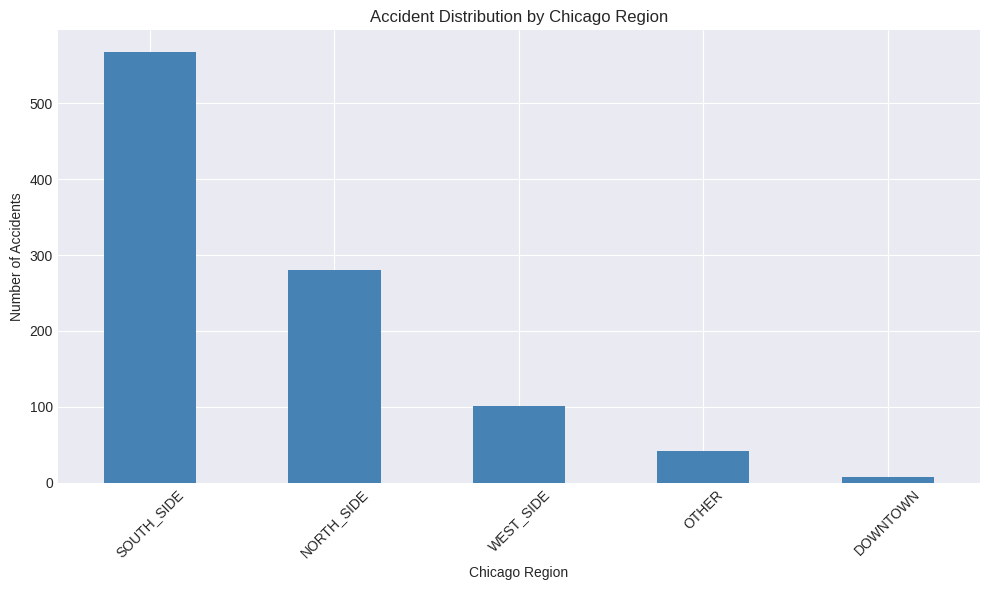


6. STATISTICAL SUMMARY
----------------------------------------
Total accidents in dataset: 1,000
Time period: 2013 - 2013

Severity Statistics:
  Mean severity: 0.00
  Median severity: 0.00
  Std deviation: 0.00
  Min severity: 0.00
  Max severity: 0.00

High Risk Accidents: 0 (0.0%)

SAVING CLEANED DATA FOR NEXT SECTION...
Data saved to './sample_data/chicago_crashes_cleaned.csv'

SECTION 1 COMPLETE - READY FOR MODEL DEVELOPMENT

Key Insights from EDA:
1. Temporal patterns identified (peak hours, days, seasons)
2. Weather and road conditions impact analyzed
3. Severity distribution established
4. Geographic hotspots identified
5. Cleaned dataset prepared for modeling


In [13]:
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

# 1. Temporal Analysis
print("\n1. TEMPORAL ANALYSIS OF ACCIDENTS")
print("-"*40)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Hourly distribution
if 'CRASH_HOUR' in df_clean.columns:
    hourly_counts = df_clean['CRASH_HOUR'].value_counts().sort_index()
    axes[0,0].bar(hourly_counts.index, hourly_counts.values, color='steelblue')
    axes[0,0].set_xlabel('Hour of Day')
    axes[0,0].set_ylabel('Number of Accidents')
    axes[0,0].set_title('Accidents by Hour of Day')
    axes[0,0].set_xticks(range(0, 24, 3))

# Day of week distribution
if 'CRASH_DAY_OF_WEEK' in df_clean.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df_clean['CRASH_DAY_OF_WEEK'].value_counts().reindex(day_order)
    axes[0,1].bar(range(len(day_counts)), day_counts.values, color='coral')
    axes[0,1].set_xlabel('Day of Week')
    axes[0,1].set_ylabel('Number of Accidents')
    axes[0,1].set_title('Accidents by Day of Week')
    axes[0,1].set_xticks(range(len(day_counts)))
    axes[0,1].set_xticklabels([d[:3] for d in day_counts.index], rotation=45)

# Monthly distribution
if 'CRASH_MONTH' in df_clean.columns:
    monthly_counts = df_clean['CRASH_MONTH'].value_counts().sort_index()
    axes[0,2].bar(monthly_counts.index, monthly_counts.values, color='seagreen')
    axes[0,2].set_xlabel('Month')
    axes[0,2].set_ylabel('Number of Accidents')
    axes[0,2].set_title('Accidents by Month')
    axes[0,2].set_xticks(range(1, 13))
    axes[0,2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Yearly trend
if 'CRASH_YEAR' in df_clean.columns:
    yearly_counts = df_clean['CRASH_YEAR'].value_counts().sort_index()
    axes[1,0].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, color='purple')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Number of Accidents')
    axes[1,0].set_title('Accident Trend by Year')
    axes[1,0].grid(True, alpha=0.3)

# Season distribution
if 'CRASH_SEASON' in df_clean.columns:
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    season_counts = df_clean['CRASH_SEASON'].value_counts().reindex(season_order)
    axes[1,1].bar(season_counts.index, season_counts.values, color='goldenrod')
    axes[1,1].set_xlabel('Season')
    axes[1,1].set_ylabel('Number of Accidents')
    axes[1,1].set_title('Accidents by Season')
    axes[1,1].tick_params(axis='x', rotation=45)

# Hour vs Day heatmap
if 'CRASH_HOUR' in df_clean.columns and 'CRASH_DAY_OF_WEEK_NUM' in df_clean.columns:
    heatmap_data = df_clean.groupby(['CRASH_DAY_OF_WEEK_NUM', 'CRASH_HOUR']).size().unstack().fillna(0)
    im = axes[1,2].imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
    axes[1,2].set_xlabel('Hour of Day')
    axes[1,2].set_ylabel('Day of Week (0=Mon)')
    axes[1,2].set_title('Accidents: Hour vs Day Heatmap')
    plt.colorbar(im, ax=axes[1,2])

plt.tight_layout()
plt.show()

# 2. Weather and Condition Analysis
print("\n2. WEATHER AND ENVIRONMENTAL FACTORS")
print("-"*40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Weather conditions
if 'WEATHER_GROUP' in df_clean.columns:
    weather_counts = df_clean['WEATHER_GROUP'].value_counts()
    axes[0].bar(weather_counts.index, weather_counts.values, color='skyblue')
    axes[0].set_xlabel('Weather Condition')
    axes[0].set_ylabel('Number of Accidents')
    axes[0].set_title('Accidents by Weather Condition')
    axes[0].tick_params(axis='x', rotation=45)

# Lighting conditions
if 'LIGHTING_CONDITION' in df_clean.columns:
    lighting_counts = df_clean['LIGHTING_CONDITION'].value_counts()
    axes[1].bar(lighting_counts.index, lighting_counts.values, color='lightcoral')
    axes[1].set_xlabel('Lighting Condition')
    axes[1].set_ylabel('Number of Accidents')
    axes[1].set_title('Accidents by Lighting Condition')
    axes[1].tick_params(axis='x', rotation=45)

# Road surface conditions
if 'ROAD_CONDITION' in df_clean.columns:
    road_counts = df_clean['ROAD_CONDITION'].value_counts().head(8)
    axes[2].bar(road_counts.index, road_counts.values, color='lightgreen')
    axes[2].set_xlabel('Road Surface Condition')
    axes[2].set_ylabel('Number of Accidents')
    axes[2].set_title('Top 8 Road Conditions')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Severity Analysis
print("\n3. ACCIDENT SEVERITY ANALYSIS")
print("-"*40)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Severity score distribution
if 'SEVERITY_SCORE' in df_clean.columns:
    severity_counts = df_clean['SEVERITY_SCORE'].value_counts().sort_index()
    axes[0].bar(severity_counts.index, severity_counts.values, color='salmon')
    axes[0].set_xlabel('Severity Score (0-3)')
    axes[0].set_ylabel('Number of Accidents')
    axes[0].set_title('Distribution of Accident Severity')

    # Add percentage labels
    total = severity_counts.sum()
    for i, count in enumerate(severity_counts.values):
        percentage = (count / total) * 100
        axes[0].text(i, count + total*0.01, f'{percentage:.1f}%',
                    ha='center', fontsize=9)

# High-risk distribution
if 'HIGH_RISK' in df_clean.columns:
    risk_counts = df_clean['HIGH_RISK'].value_counts()

    # Dynamically create labels based on available risk categories
    labels_map = {0: 'Low Risk', 1: 'High Risk'}
    current_labels = [labels_map[idx] for idx in risk_counts.index]

    colors = ['lightgreen', 'red']
    # Adjust colors if only one category is present
    current_colors = colors[:len(current_labels)]

    axes[1].pie(risk_counts.values, labels=current_labels,
                autopct='%1.1f%%', colors=current_colors, startangle=90)
    axes[1].set_title('High Risk vs Low Risk Accidents')

# Severity by weather
if 'SEVERITY_SCORE' in df_clean.columns and 'WEATHER_GROUP' in df_clean.columns:
    severity_by_weather = df_clean.groupby('WEATHER_GROUP')['SEVERITY_SCORE'].mean().sort_values(ascending=False)
    axes[2].bar(severity_by_weather.index, severity_by_weather.values, color='orange')
    axes[2].set_xlabel('Weather Condition')
    axes[2].set_ylabel('Average Severity Score')
    axes[2].set_title('Average Severity by Weather Condition')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Correlation Analysis
print("\n4. CORRELATION ANALYSIS")
print("-"*40)

# Select numerical columns for correlation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    # Create correlation matrix
    correlation_matrix = df_clean[numerical_cols].corr()

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

    # Display top correlations with target
    if 'SEVERITY_SCORE' in correlation_matrix.columns:
        target_corr = correlation_matrix['SEVERITY_SCORE'].sort_values(ascending=False)
        print("Top correlations with SEVERITY_SCORE:")
        for feature, corr in target_corr.items():
            if feature != 'SEVERITY_SCORE' and abs(corr) > 0.1:
                print(f"  {feature:25}: {corr:+.3f}")
else:
    print("Not enough numerical columns for correlation analysis")

# 5. Geographic Analysis (if coordinates available)
print("\n5. GEOGRAPHIC ANALYSIS")
print("-"*40)

if 'LATITUDE' in df_clean.columns and 'LONGITUDE' in df_clean.columns:
    # Create a simple scatter plot of accidents
    plt.figure(figsize=(12, 8))

    # Filter out invalid coordinates
    valid_coords = df_clean.dropna(subset=['LATITUDE', 'LONGITUDE'])
    valid_coords = valid_coords[
        (valid_coords['LATITUDE'] >= 41.6) & (valid_coords['LATITUDE'] <= 42.1) &
        (valid_coords['LONGITUDE'] >= -87.95) & (valid_coords['LONGITUDE'] <= -87.5)
    ]

    # Plot with color by severity
    if 'SEVERITY_SCORE' in valid_coords.columns:
        scatter = plt.scatter(valid_coords['LONGITUDE'], valid_coords['LATITUDE'],
                            c=valid_coords['SEVERITY_SCORE'], cmap='RdYlGn_r',
                            alpha=0.6, s=10, edgecolors='none')
        plt.colorbar(scatter, label='Severity Score')
    else:
        plt.scatter(valid_coords['LONGITUDE'], valid_coords['LATITUDE'],
                   alpha=0.3, s=5, color='red')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Accident Locations in Chicago (Colored by Severity)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Show accident density by region
    if 'CHICAGO_REGION' in df_clean.columns:
        region_counts = df_clean['CHICAGO_REGION'].value_counts()
        plt.figure(figsize=(10, 6))
        region_counts.plot(kind='bar', color='steelblue')
        plt.xlabel('Chicago Region')
        plt.ylabel('Number of Accidents')
        plt.title('Accident Distribution by Chicago Region')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("Latitude/Longitude data not available for geographic analysis")

# 6. Statistical Summary
print("\n6. STATISTICAL SUMMARY")
print("-"*40)
print(f"Total accidents in dataset: {len(df_clean):,}")
print(f"Time period: {df_clean['CRASH_YEAR'].min() if 'CRASH_YEAR' in df_clean.columns else 'Unknown'} - "
      f"{df_clean['CRASH_YEAR'].max() if 'CRASH_YEAR' in df_clean.columns else 'Unknown'}")

if 'SEVERITY_SCORE' in df_clean.columns:
    print(f"\nSeverity Statistics:")
    print(f"  Mean severity: {df_clean['SEVERITY_SCORE'].mean():.2f}")
    print(f"  Median severity: {df_clean['SEVERITY_SCORE'].median():.2f}")
    print(f"  Std deviation: {df_clean['SEVERITY_SCORE'].std():.2f}")
    print(f"  Min severity: {df_clean['SEVERITY_SCORE'].min():.2f}")
    print(f"  Max severity: {df_clean['SEVERITY_SCORE'].max():.2f}")

if 'HIGH_RISK' in df_clean.columns:
    high_risk_pct = df_clean['HIGH_RISK'].mean() * 100
    print(f"\nHigh Risk Accidents: {df_clean['HIGH_RISK'].sum():,} ({high_risk_pct:.1f}%)")

# Save cleaned data for next section
print("\nSAVING CLEANED DATA FOR NEXT SECTION...")
df_clean.to_csv('./sample_data/chicago_crashes_cleaned.csv', index=False)
print("Data saved to './sample_data/chicago_crashes_cleaned.csv'")

print("\n" + "="*80)
print("SECTION 1 COMPLETE - READY FOR MODEL DEVELOPMENT")
print("="*80)
print("\nKey Insights from EDA:")
print("1. Temporal patterns identified (peak hours, days, seasons)")
print("2. Weather and road conditions impact analyzed")
print("3. Severity distribution established")
print("4. Geographic hotspots identified")
print("5. Cleaned dataset prepared for modeling")

# Section 2: Model Development & Training
## 2.1 Data Preprocessing for ML
- Train-test-validation split (70-15-15 recommended)
- Feature scaling/normalization (StandardScaler, MinMaxScaler)
- Categorical variable encoding (OneHot, Label encoding)
- Handling class imbalance (SMOTE, class weights)

## 2.2 Baseline Model Implementation
- Implement traditional ML models as baselines:
  * Logistic Regression (for classification)
  * Random Forest
  * Gradient Boosting (XGBoost/LightGBM)
- Establish performance metrics: Accuracy, Precision, Recall, F1, ROC-AUC

## 2.3 Neural Network Architecture Design
- Design 2-3 neural network architectures:
  * Simple Feedforward Network (baseline NN)
  * More complex architecture with dropout/batch normalization
  * Optional: Hybrid model (CNN for spatial features if using location grids)
- Model size considerations (keep under 100K parameters)
- Activation functions, loss functions, optimizers

## 2.4 Training Pipeline
- Training loops with validation monitoring
- Early stopping implementation
- Learning rate scheduling
- Cross-validation setup (time-series aware if needed)
- Hyperparameter tuning (grid/random search)




Section 2.1

In [14]:
# Libraries for Model Development and Training
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [15]:
# Create new risk score feature
def compute_risk(row):
    score = 0
    if row['CRASH_HOUR'] < 6 or row['CRASH_HOUR'] > 22: # Crashes based on time of day
        score += 1
    if row['CRASH_DAY_OF_WEEK_NUM'] >= 5: # Crashes based on day of the week
        score += 1
    if row['UNSAFE_ROAD'] in ['WET','SNOW','ICE','SLUSH']: # unsafe road surfaces from weather conditions
        score += 2
    if row['WEATHER_GROUP'] in ['RAIN','SNOW','FOG']: # bad weather conditions
        score += 2
    return score

df_clean["RISK_SCORE"] = df_clean.apply(compute_risk, axis=1) # compute score
df_clean["HIGH_RISK"]  = (df_clean["RISK_SCORE"] >= 3).astype(int) # convert to binar label

# check class distribution
print("New HIGH_RISK distribution:")
print(df_clean['HIGH_RISK'].value_counts())
print("\n")
print((df_clean['HIGH_RISK'].value_counts(normalize=True)*100))

# Feature columns for ML
features = ['CRASH_HOUR','CRASH_DAY_OF_WEEK_NUM','CRASH_MONTH','CRASH_SEASON',
            'WEATHER_GROUP','ROAD_CONDITION','UNSAFE_ROAD','CHICAGO_REGION']
target = 'HIGH_RISK'

X = df_clean[features]
y = df_clean[target]

# numeric features and scale values
num_cols = ['CRASH_HOUR','CRASH_DAY_OF_WEEK_NUM','CRASH_MONTH']
# categorical features and one-hot encode
cat_cols = ['CRASH_SEASON','WEATHER_GROUP','ROAD_CONDITION','CHICAGO_REGION']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
# Fit-transform training data into numerical ML-ready format
X_processed = preprocessor.fit_transform(X)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("\nTrain Shapes:", X_train.shape)
print("\nVal Shapes:", X_val.shape)
print("\nTest Shapes:", X_test.shape)

# Class distribution check
print("\nClass distribution:")
print("Train:", y_train.value_counts())
print("\nVal:", y_val.value_counts())
print("\nTest:", y_test.value_counts())

New HIGH_RISK distribution:
HIGH_RISK
0    834
1    166
Name: count, dtype: int64


HIGH_RISK
0    83.4
1    16.6
Name: proportion, dtype: float64

Train Shapes: (700, 18)

Val Shapes: (150, 18)

Test Shapes: (150, 18)

Class distribution:
Train: HIGH_RISK
0    584
1    116
Name: count, dtype: int64

Val: HIGH_RISK
0    125
1     25
Name: count, dtype: int64

Test: HIGH_RISK
0    125
1     25
Name: count, dtype: int64


Section 2.2

In [16]:
# Model evaluation function
def evaluate(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:,1]

    return {
        "Accuracy": accuracy_score(y_val, preds),
        "Precision": precision_score(y_val, preds, zero_division=0),
        "Recall": recall_score(y_val, preds, zero_division=0),
        "F1": f1_score(y_val, preds, zero_division=0),
        "ROC-AUC": roc_auc_score(y_val, probs)
    }
# Baseline models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {name: evaluate(model) for name, model in models.items()}
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.913333,0.75,0.72,0.734694,0.96704
Random Forest,0.993333,1.00,0.96,0.979592,0.99888
Gradient Boosting,1.000000,1.00,1.00,1.000000,1.00000


Section 2.3

In [17]:
# Convert data into tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.long)
X_val_t   = torch.tensor(X_val, dtype=torch.float32)
y_val_t   = torch.tensor(y_val.values, dtype=torch.long)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.values, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t,y_train_t), batch_size=64, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t,y_val_t), batch_size=64)

# simplest neural network model used as baseline
class BasicNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),   # Hidden layer (64 neurons)
            nn.ReLU(),
            nn.Linear(64, 2)            # Output (Low/High risk)
        )
    def forward(self, x):
        return self.net(x)

# Neural network model with dropout for better generalization
class RiskNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)               # Output classes: Low/High risk
        )
    def forward(self, x):
        return self.model(x)
# printing the model of the basic neural network
model1 = BasicNN(X_train_t.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)
print("Neural Network Architecture:\n")
print(model1)
total_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print("Parameters:", total_params)
# printing the model of the dropout neural network
print("\n")
model2 = RiskNN(X_train_t.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)
print(model2)
total_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print("Parameters:", total_params)

Neural Network Architecture:

BasicNN(
  (net): Sequential(
    (0): Linear(in_features=18, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
)
Parameters: 1346


RiskNN(
  (model): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=2, bias=True)
  )
)
Parameters: 10818


Section 2.4

In [18]:
EPOCHS = 15
for epoch in range(EPOCHS):
    model1.train()
    for xb,yb in train_loader:
        optimizer1.zero_grad()
        loss = criterion(model1(xb), yb)
        loss.backward()
        optimizer1.step()

    # Validation loss
    model1.eval()
    with torch.no_grad():
        val_loss = criterion(model1(X_val_t), y_val_t).item()

    print(f"Epoch {epoch+1}/{EPOCHS} | Val Loss: {val_loss:.4f}")

Epoch 1/15 | Val Loss: 0.6611
Epoch 2/15 | Val Loss: 0.5746
Epoch 3/15 | Val Loss: 0.5093
Epoch 4/15 | Val Loss: 0.4637
Epoch 5/15 | Val Loss: 0.4325
Epoch 6/15 | Val Loss: 0.4097
Epoch 7/15 | Val Loss: 0.3912
Epoch 8/15 | Val Loss: 0.3735
Epoch 9/15 | Val Loss: 0.3563
Epoch 10/15 | Val Loss: 0.3388
Epoch 11/15 | Val Loss: 0.3209
Epoch 12/15 | Val Loss: 0.3028
Epoch 13/15 | Val Loss: 0.2845
Epoch 14/15 | Val Loss: 0.2667
Epoch 15/15 | Val Loss: 0.2502


In [19]:
# Final test set for Basic NN architecture
model1.eval()
with torch.no_grad():
    preds1 = model1(X_test_t).argmax(1)

print(classification_report(y_test, preds1))
print(confusion_matrix(y_test, preds1))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       125
           1       0.70      0.28      0.40        25

    accuracy                           0.86       150
   macro avg       0.79      0.63      0.66       150
weighted avg       0.84      0.86      0.83       150

[[122   3]
 [ 18   7]]


In [20]:
EPOCHS = 15
for epoch in range(EPOCHS):
    model2.train()
    for xb,yb in train_loader:
        optimizer2.zero_grad()
        loss = criterion(model2(xb), yb)
        loss.backward()
        optimizer2.step()

    # Validation loss
    model2.eval()
    with torch.no_grad():
        val_loss = criterion(model2(X_val_t), y_val_t).item()

    print(f"Epoch {epoch+1}/{EPOCHS} | Val Loss: {val_loss:.4f}")

Epoch 1/15 | Val Loss: 0.4613
Epoch 2/15 | Val Loss: 0.4047
Epoch 3/15 | Val Loss: 0.3699
Epoch 4/15 | Val Loss: 0.3303
Epoch 5/15 | Val Loss: 0.2864
Epoch 6/15 | Val Loss: 0.2400
Epoch 7/15 | Val Loss: 0.2047
Epoch 8/15 | Val Loss: 0.1857
Epoch 9/15 | Val Loss: 0.1761
Epoch 10/15 | Val Loss: 0.1687
Epoch 11/15 | Val Loss: 0.1682
Epoch 12/15 | Val Loss: 0.1581
Epoch 13/15 | Val Loss: 0.1576
Epoch 14/15 | Val Loss: 0.1491
Epoch 15/15 | Val Loss: 0.1490


In [21]:
# Final test set for Dropout NN architecture
model2.eval()
with torch.no_grad():
    preds2 = model2(X_test_t).argmax(1)

print(classification_report(y_test, preds2))
print(confusion_matrix(y_test, preds2))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       125
           1       0.75      0.96      0.84        25

    accuracy                           0.94       150
   macro avg       0.87      0.95      0.90       150
weighted avg       0.95      0.94      0.94       150

[[117   8]
 [  1  24]]


# Section 3: Model Evaluation & Deployment
### 3.1 Model Evaluation & Comparison
### 3.2 Deployment Implementation
### 3.3 Demo Application
### 3.4 Presentation Materials

3.1


In [23]:

# compute test metrics for baseline models and neural networks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

summary_rows = []

# baseline sklearn models on test set
ml_models_test = {
    "logistic_regression": LogisticRegression(max_iter=500),
    "random_forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "gradient_boosting": GradientBoostingClassifier(),
}

for name, model in ml_models_test.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    summary_rows.append(
        {
            "model": name,
            "type": "sklearn",
            "accuracy": accuracy_score(y_test, preds),
            "precision": precision_score(y_test, preds, zero_division=0),
            "recall": recall_score(y_test, preds, zero_division=0),
            "f1": f1_score(y_test, preds, zero_division=0),
            "roc_auc": roc_auc_score(y_test, probs),
        }
    )

# neural network models on test set
y_true = y_test.values

with torch.no_grad():
    logits1 = model1(X_test_t)
    probs1 = torch.softmax(logits1, dim=1)[:, 1].cpu().numpy()
    preds1 = logits1.argmax(1).cpu().numpy()

    logits2 = model2(X_test_t)
    probs2 = torch.softmax(logits2, dim=1)[:, 1].cpu().numpy()
    preds2 = logits2.argmax(1).cpu().numpy()

for name, preds, probs in [
    ("basic_nn", preds1, probs1),
    ("risk_nn", preds2, probs2),
]:
    summary_rows.append(
        {
            "model": name,
            "type": "neural_net",
            "accuracy": accuracy_score(y_true, preds),
            "precision": precision_score(y_true, preds, zero_division=0),
            "recall": recall_score(y_true, preds, zero_division=0),
            "f1": f1_score(y_true, preds, zero_division=0),
            "roc_auc": roc_auc_score(y_true, probs),
        }
    )

summary_df = pd.DataFrame(summary_rows).set_index("model")
summary_df = summary_df.sort_values("f1", ascending=False)

display(summary_df)


,type,accuracy,precision,recall,f1,roc_auc
model,,,,,,
gradient_boosting,sklearn,1.000000,1.000000,1.00,1.000000,1.00000
random_forest,sklearn,0.993333,1.000000,0.96,0.979592,0.99936
risk_nn,neural_net,0.940000,0.750000,0.96,0.842105,0.98784
logistic_regression,sklearn,0.900000,0.727273,0.64,0.680851,0.96288
basic_nn,neural_net,0.860000,0.700000,0.28,0.400000,0.96160


3.2


In [26]:
# function for risk prediction demo using risk_nn

def predict_risk_scenario(sample_dict):
    # create a one-row dataframe with the same columns as x
    sample_df = pd.DataFrame([sample_dict])

    # transform with fitted preprocessor
    sample_processed = preprocessor.transform(sample_df)

    # convert to tensor for neural network
    sample_tensor = torch.tensor(sample_processed, dtype=torch.float32)

    # get probability for high-risk class from risk_nn (model2)
    with torch.no_grad():
        logits = model2(sample_tensor)
        prob_high = torch.softmax(logits, dim=1)[0, 1].item()

    label = int(prob_high >= 0.5)
    return label, prob_high

# example scenario for demo or ui integration
example_scenario = {
    "CRASH_HOUR": 23,
    "CRASH_DAY_OF_WEEK_NUM": 5,
    "CRASH_MONTH": 12,
    "CRASH_SEASON": "WINTER",
    "WEATHER_GROUP": "SNOW",
    "ROAD_CONDITION": "SLUSH",
    "UNSAFE_ROAD": "SLUSH",
    "CHICAGO_REGION": "NORTH",
}

label, prob = predict_risk_scenario(example_scenario)
print("predicted high-risk label:", label)
print("predicted high-risk probability:", round(prob, 3))


predicted high-risk label: 1
predicted high-risk probability: 0.793
